## University Graduate Admissions Prediction

In this project, we will build a regression model to predict the chance of admission into a particular university based on the students profile.

Input Features:
1. GRE Scores (out of 340)
2. TOEFL Scores (out of 120)
3. University Rating (out of 5)
4. Statement of Purpose / Letter of Recommendation Strength (out of 5)
5. Undergraduate GPA (out of 10)
6. Research Experience (either 0 or 1)

Output Feature:
1. Chance of Admit (ranging from 0 to 1) 

The data used in this project was extracted from kaggle via the following link:
https://www.kaggle.com/mohansacharya/graduate-admissions

#### Import Libraries and Dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
import os

In [15]:
admission_data = pd.read_csv("Admission.csv")

In [16]:
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
# remove the serial no. column
admission_data.drop("Serial No.", axis=1, inplace =  True)

In [18]:
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
admission_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
# remove spacing from Chance of Admit Column
admission_data.rename(columns={"Chance of Admit ": "Chance of Admit"},inplace=True)
admission_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

#### Perform EDA and Preprocessing

In [21]:
# check for null values
admission_data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [22]:
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [23]:
admission_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [24]:
admission_university = admission_data.groupby("University Rating").mean()

In [25]:
admission_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


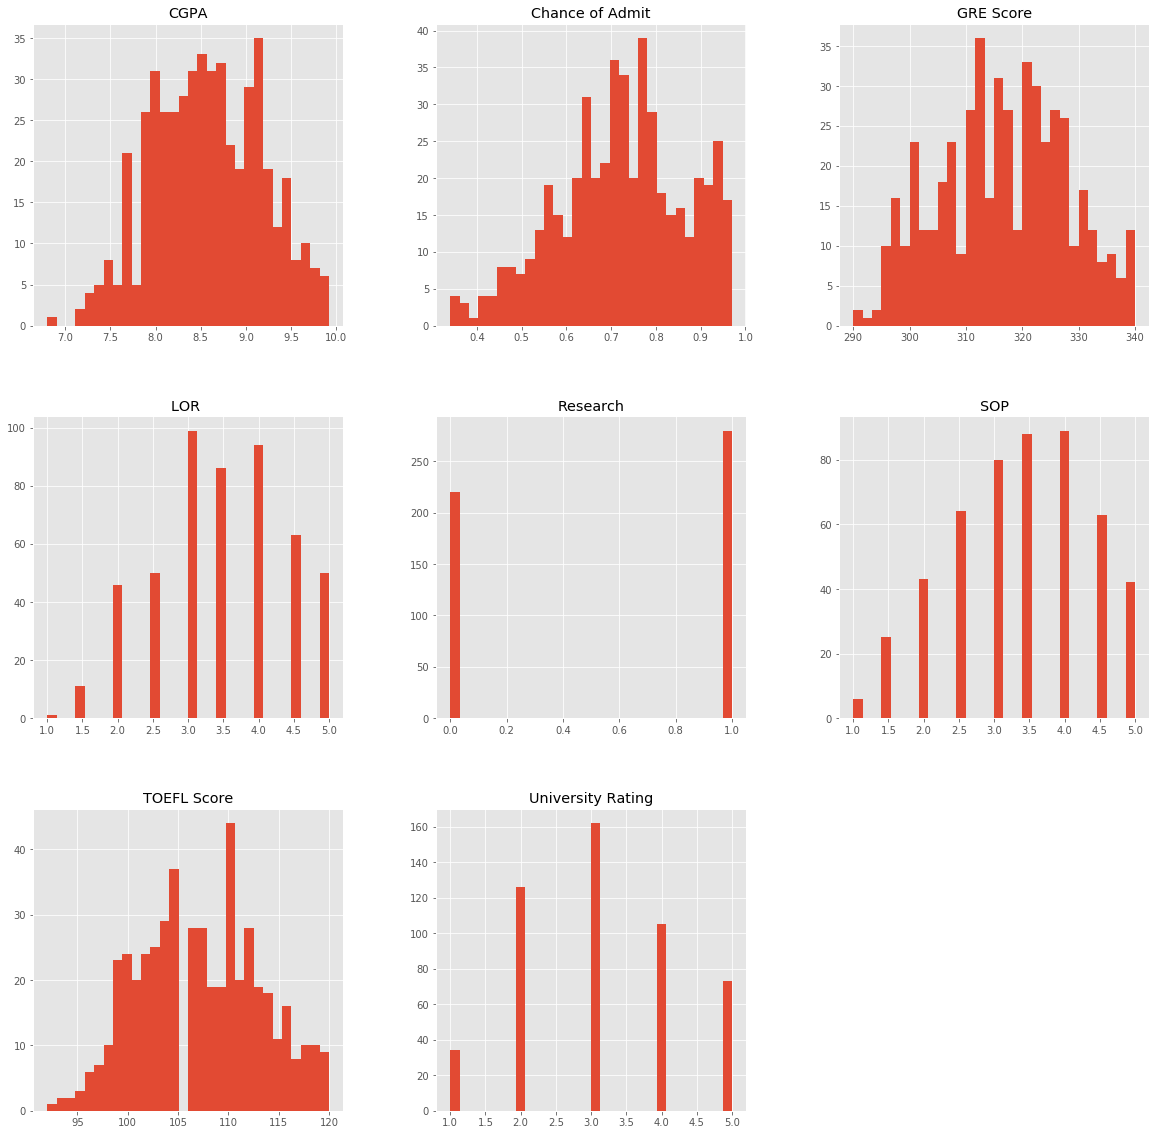

In [26]:
# plt.figure(figsize = (12,6))
# admission_data["mean_GRE"] = admission_data["GRE Score"].mean()
# sns.catplot(x="University Rating", y="mean_GRE", data =admission_grouped, kind = "bar")
# plt.title("University Rating");
admission_data.hist(bins = 30, figsize = (20,20));

In [27]:
admission_data["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

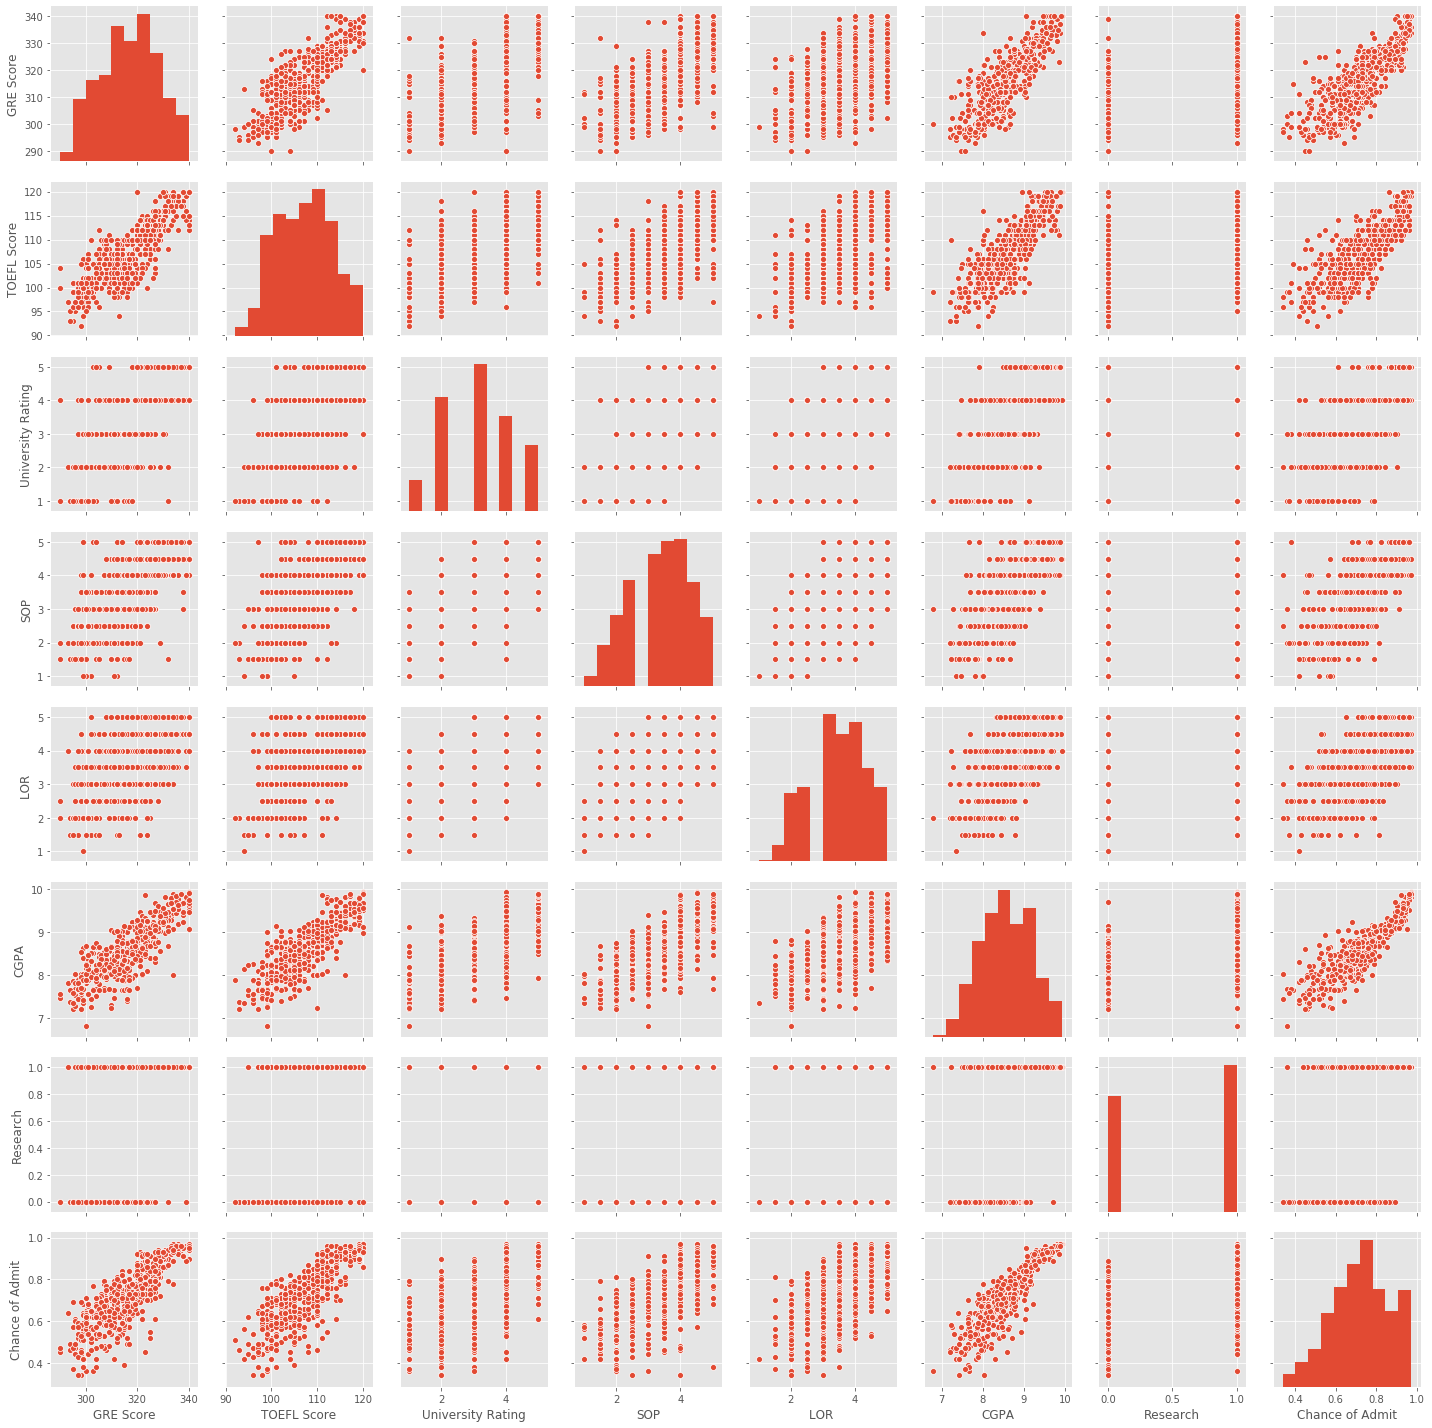

In [28]:
# check the relationship between all the features in the admissions dataframe
sns.pairplot(admission_data);

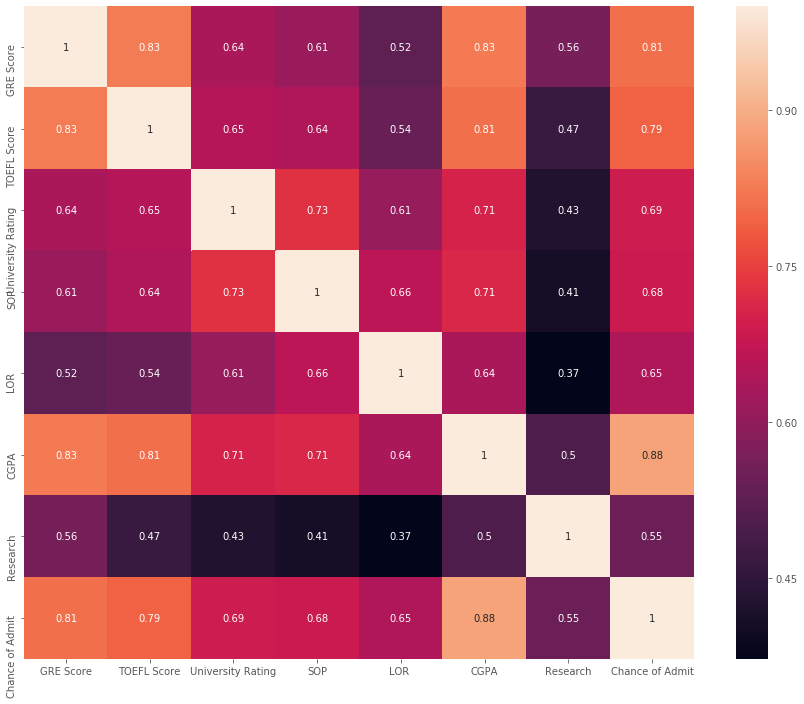

In [29]:
corr_matrix = admission_data.corr()
plt.figure(figsize = (15,12))
ax = sns.heatmap(corr_matrix, annot = True);
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

In [30]:
admission_data.shape

(500, 8)

In [31]:
# split the output features from the other features from the dataset
X = admission_data.drop(columns = "Chance of Admit")
y = admission_data["Chance of Admit"]

In [32]:
print(X.shape)
print(y.shape)
X=np.array(X)
y=np.array(y)
y=y.reshape(-1,1)
print(X.shape)
print(y.shape)

(500, 7)
(500,)
(500, 7)
(500, 1)


In [33]:
# scale data before training the model to avoid bias towards any particular feature 
# - to make all features equal
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scale input features
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

# scale output feature
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [34]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

#### Train and Evaluate Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [36]:
# fit the model
lr_model = LinearRegression();
lr_model.fit(X_train, y_train);

In [37]:
# get accuracy score
accuracy_model = lr_model.score(X_test, y_test)
accuracy_model

0.8399583426256604

#### Building an Artificial Neural Network (ANN)

In [39]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

In [40]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7)) # 7 input features as input_dim, 50 neurons in the dense layer
ANN_model.add(Activation("relu")) # rectified linear unit as activation

ANN_model.add(Dense(150))
ANN_model.add(Activation("relu"))
ANN_model.add(Dropout(0.5)) 
# dropout drop 50% of all the neurons and the connected weights to ensure network is not overfitting

ANN_model.add(Dense(150))
ANN_model.add(Activation("relu"))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation("linear"))
ANN_model.add(Dense(1))

ANN_model.compile(loss = "mse", optimizer = "adam")
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                400       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_3 (Activation)    (None, 150)              

In [41]:
ANN_model.compile(optimizer = "Adam", loss = "mean_squared_error")

In [42]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
425/425 [==============================] - 0s 455us/step - loss: 0.5938
Epoch 2/100
425/425 [==============================] - 0s 77us/step - loss: 0.3865
Epoch 3/100
425/425 [==============================] - 0s 73us/step - loss: 0.3055
Epoch 4/100
425/425 [==============================] - 0s 89us/step - loss: 0.2834
Epoch 5/100
425/425 [==============================] - 0s 68us/step - loss: 0.2810
Epoch 6/100
425/425 [==============================] - 0s 66us/step - loss: 0.2704
Epoch 7/100
425/425 [==============================] - 0s 68us/step - loss: 0.2573
Epoch 8/100
425/425 [==============================] - 0s 68us/step - loss: 0.2547
Epoch 9/100
425/425 [==============================] - 0s 70us/step - loss: 0.2284
Epoch 10/100
425/425 [==============================] - 0s 70us/step - loss: 0.2370
Epoch 11/100
425/425 [==============================] - 0s 73us/step - loss: 0.2427
Epoch 12/100
425/425 [==============================] - 0s 70us/step - loss: 0.2229


425/425 [==============================] - 0s 75us/step - loss: 0.1125
Epoch 99/100
425/425 [==============================] - 0s 75us/step - loss: 0.1301
Epoch 100/100
425/425 [==============================] - 0s 77us/step - loss: 0.1270


In [43]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

75/75 [==============================] - 0s 266us/step
Accuracy : 0.7557894496122997


In [44]:
epochs_hist.history.keys()

dict_keys(['loss'])

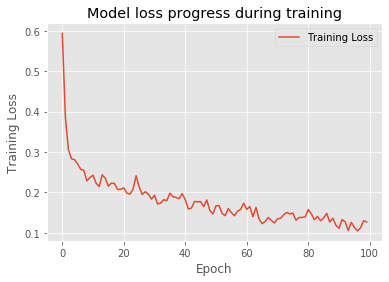

In [45]:
plt.plot(epochs_hist.history["loss"])
plt.title("Model loss progress during training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"]);

#### Train and Evaluate Decision Tree and Random Forest Models

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train);

In [47]:
accuracy_score_dt = dt_model.score(X_test, y_test)

In [48]:
accuracy_score_dt

0.6100677477385525

In [49]:
from sklearn.ensemble import RandomForestRegressor
y_train = y_train.ravel()
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10);
rf_model.fit(X_train, y_train);

In [50]:
accuracy_rf = rf_model.score(X_test, y_test)
accuracy_rf

0.7929615304391684

#### Calculate Regression Models KPIs

In [51]:
y_pred = lr_model.predict(X_test)

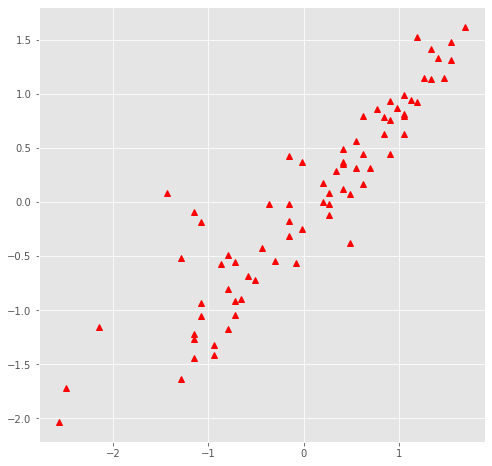

In [53]:
plt.figure(figsize = (8,8))
plt.plot(y_test, y_pred, "^", color="red");
# y_test on the x-axis and y_pred on the y-axis

In [54]:
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)

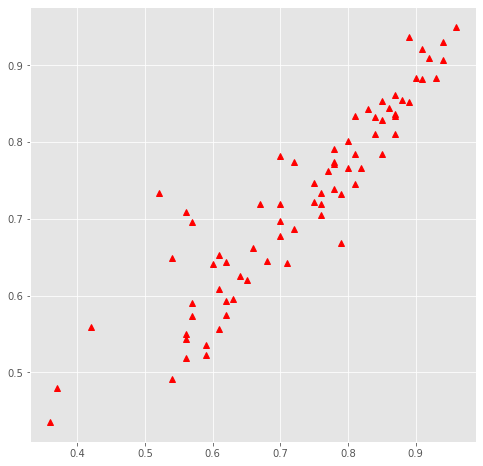

In [55]:
plt.figure(figsize = (8,8))
plt.plot(y_test_original, y_pred_original, "^", color="red");

In [56]:
k = X_test.shape[1] # number of independent variables
n = len(X_test) # sample size

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [58]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_pred_original)), ".3f"))
MSE = float(mean_squared_error(y_test_original, y_pred_original))
MAE = float(mean_absolute_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)
adj_r2 = 1 - ((1-r2)*(n-1) / (n-k-1))

In [59]:
print("RMSE :", RMSE)
print("MSE :", MSE)
print("MAE :", MAE)
print("r2 Score :", r2)
print("adjusted r2 score :", adj_r2)

RMSE : 0.056
MSE : 0.0031220385935432377
MAE : 0.0406274840711297
r2 Score : 0.8399583426256604
adjusted r2 score : 0.8232375724522218
